<a id="top"></a>
<div class="alert alert-success">

<font color='Blue'> <h2> Tensorflow Hub is repository for all the pretrained models </h2> </font>

- Transfer learning is a machine learning technique in which intelligence (i.e.: weights) from a base artificial neural network is being transferred to a new network as a starting point to perform a specific task. 
- Transfer learning is a key skill to acquire as a data scientist since it can dramatically reduce the computational time required if the network is being trained from scratch (i.e.: starting from purely random weights). 
- In this project, we are going to use a trained ANN known as MobileNet that come readily trained/available from TF 2.0 Hub
- We are going to use TensorFlow Flowers dataset 
- This code is based on TensorFlow 2.0 Hub documentation: https://www.tensorflow.org/beta/tutorials/images/hub_with_keras

<font color='blue'><h3>**on transfer learning we get previous trained model and use only CNN layers , reason is we only need weights on CNN layers and we can transfer that learning to train our model, CNN layer trained in a way to identify mose importtant featuere of picture , and once they extract those feature we can feed to our dense layer and train our model**</h3></font>

[load_model](#loadModel)
- [import labels](#importlabels)
- [batch import](#batch)
- [apply Transfer learning](#apply)


In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random 


In [3]:
#pip install tensorflow_hub


In [4]:
 # tf hub is repository for all models
import tensorflow_hub as hub

<a id="loadModel"></a>
***

In [6]:
# check url , it include lots of models
Trained_MobileNet_url ="https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/2" #@param {type:"string"}


# load model , it goes to the url (using tf library) and sepcify input shape
Trained_MobileNet = tf.keras.Sequential([
    hub.KerasLayer(Trained_MobileNet_url, input_shape=(224,224,3))])

# STEP #3: EVALUATE PRE-TRAINED MOBILENET (JUST TO BE SURE :)!)
- Check this out: http://www.image-net.org/synset?wnid=n02835271
- Search for Bicycle
- https://lear.inrialpes.fr/people/gordo/ImageNetResults/sift1000_accuracy_withPrior/results_sift_0253.htm

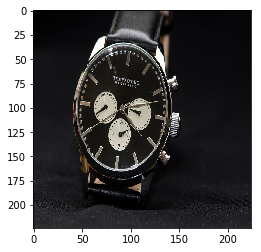

In [7]:
# import a imgae to test the model
Sample_Image= tf.keras.preprocessing.image.load_img(r'data/Transfer Learning Data/watch.jpg',
                                                    target_size = (224, 224))

plt.imshow(Sample_Image)

In [8]:
# normalize Image
Sample_Image=np.array(Sample_Image)/255

In [9]:
# expand dimension of image and feed into mdoel to predict
Predict_Class=Trained_MobileNet.predict(np.expand_dims(Sample_Image, axis=0))
Predict_Class

array([[ 0.31979904,  0.7227224 , -0.46497285, ...,  0.25369596,
        -1.4674302 , -0.00161065]], dtype=float32)

In [18]:
print (Predict_Class.shape)

# it has 1001 label use argmax to see which one is the answer
Predict_Class.argmax(1)

(1, 1001)


array([827])

In [19]:
Predict_Class[0,827]

9.338625

<a id="importlabels"></a>
***
# import labels
***

In [22]:
# import label and add it to ImageNerLabels file
labels_path = tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
imagenet_labels = np.array(open(labels_path).read().splitlines())

Text(0.5,1,'Predicted Class is: stopwatch')

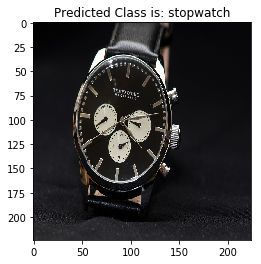

In [31]:
# show class and label

class_id=Predict_Class.argmax(1)

plt.imshow(Sample_Image)
predicted_class_name = imagenet_labels[class_id][0]
plt.title("Predicted Class is: " + predicted_class_name)

- [go back to top](#top)

<a id="batch"></a>
# STEP #4: LET'S TEST THE MODEL ON A BATCH OF IMAGES

In [32]:
# Specify path of the flowers dataset 
# download image and add into flower photos
flowers_data_url = tf.keras.utils.get_file(
  'flower_photos','https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
   untar=True)

228818944/228813984 [==============================] - 475s 2us/step


In [74]:
# rescale image (normalization)
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)

# specify directory , target size and batch size

flowers_data = image_generator.flow_from_directory(str(flowers_data_url), 
                                                   target_size=(224,224), batch_size = 64, shuffle = True)

Found 3670 images belonging to 5 classes.


In [75]:
for flowers_data_input_batch, flowers_data_label_batch in flowers_data:
  print("Image batch shape: ", flowers_data_input_batch.shape)
  print("Label batch shape: ", flowers_data_label_batch.shape)
  break

Image batch shape:  (64, 224, 224, 3)
Label batch shape:  (64, 5)


In [36]:
# predict flowe for one batch
predictions_batch = Trained_MobileNet.predict(flowers_data_input_batch)
predictions_batch.shape

(64, 1001)

In [41]:
predictions_batch.argmax(1)

array([542, 986, 948, 503, 131, 644, 947, 986, 886, 986, 310, 113, 986,
       990, 986, 959, 946, 986, 912, 310, 468, 930, 986, 947, 717, 986,
       986, 990, 985, 986, 986, 884, 884, 585, 986, 986, 986, 563, 986,
       608, 449, 323, 113, 986, 986, 986, 986, 701, 310, 986, 929, 717,
        91, 986, 182, 717, 310, 986, 947, 986, 701, 986, 868, 986])

In [42]:
# 
predicted_class_names = imagenet_labels[predictions_batch.argmax(1)]
# or predicted_class_names = imagenet_labels[np.argmax(predictions_batch, axis=-1)]
predicted_class_names

array(['drum', 'daisy', 'mushroom', 'clog', 'flamingo', 'mask', 'cardoon',
       'daisy', 'velvet', 'daisy', 'bee', 'conch', 'daisy', 'hip',
       'daisy', 'hay', 'bell pepper', 'daisy', 'wool', 'bee',
       'butcher shop', 'ice lolly', 'daisy', 'cardoon', 'picket fence',
       'daisy', 'daisy', 'hip', 'rapeseed', 'daisy', 'daisy', 'vase',
       'vase', 'hair slide', 'daisy', 'daisy', 'daisy', 'fountain',
       'daisy', "jack-o'-lantern", 'birdhouse', 'ringlet', 'conch',
       'daisy', 'daisy', 'daisy', 'daisy', 'paper towel', 'bee', 'daisy',
       'ice cream', 'picket fence', 'lorikeet', 'daisy',
       'Bedlington terrier', 'picket fence', 'bee', 'daisy', 'cardoon',
       'daisy', 'paper towel', 'daisy', 'trailer truck', 'daisy'],
      dtype='<U30')

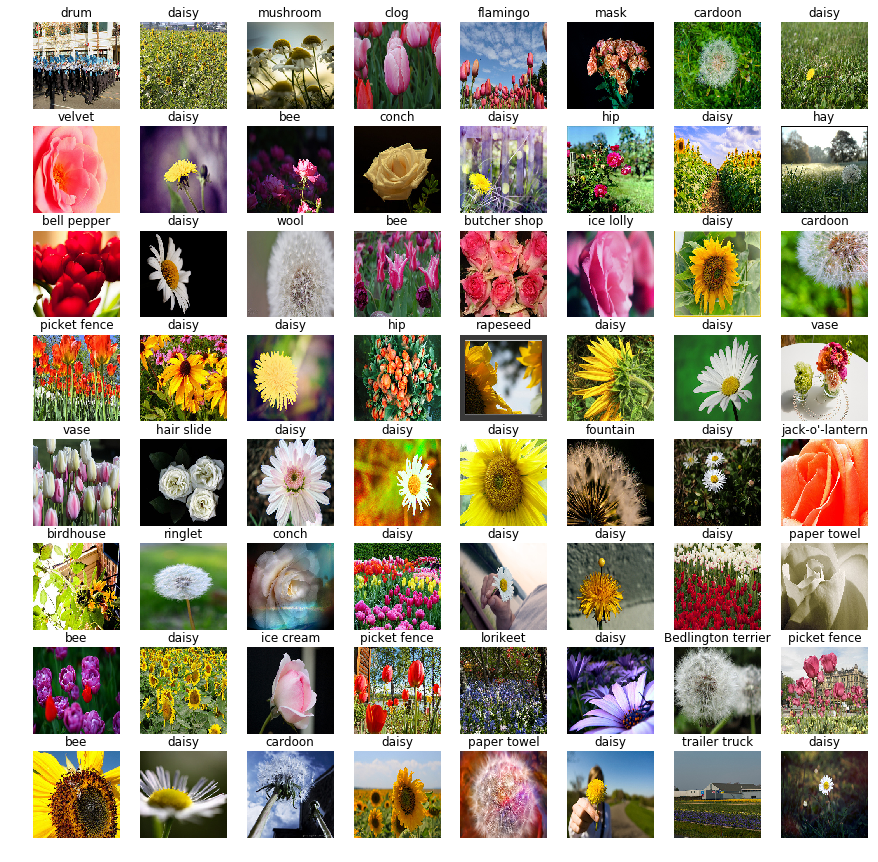

In [43]:
plt.figure(figsize=(15,15))

for n in range(64):
  plt.subplot(8,8,n+1)
  plt.imshow(flowers_data_input_batch[n])
  plt.title(predicted_class_names[n])
  plt.axis('off')

# Network performance is poor because it wasn't even trained to clasify these types of flowers!

<a id="apply"></a>

# STEP #5: APPLY TRANSFER LEARNING AND RETRAIN THE MODEL

- as it shows above the model performance is not good in the picture because model hasn't seen this flowers
- [go back to top](#top)

In [58]:
# model address
MobileNet_feature_extractor_url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/2" 
#@param {type:"string"}

In [59]:
# specify url and get model
MobileNet_feature_extractor_layer = hub.KerasLayer(MobileNet_feature_extractor_url, input_shape=(224, 224, 3))

In [60]:
feature_batch = MobileNet_feature_extractor_layer(flowers_data_input_batch)
print(feature_batch.shape)

(64, 1280)


In [61]:
MobileNet_feature_extractor_layer.trainable = False
flowers_data.num_classes

5

In [62]:
# Build a model with two pieces:
#    (1)  MobileNet Feature Extractor 
#    (2)  Dense Network (classifier) added at the end 

model = tf.keras.Sequential([
  MobileNet_feature_extractor_layer,
  tf.keras.layers.Dense(flowers_data.num_classes, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 1280)              2257984   
_________________________________________________________________
dense (Dense)                (None, 5)                 6405      
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [63]:
predictions = model(flowers_data_input_batch)

In [64]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [65]:
predictions.shape

TensorShape([64, 5])

In [66]:
history = model.fit_generator(flowers_data, epochs=50)

  ...
    to  
  ['...']


  ...
    to  
  ['...']


Train for 58 steps
Epoch 1/50
58/58 [==============================] - 45s 770ms/step - loss: 0.8049 - accuracy: 0.7161
Epoch 2/50
58/58 [==============================] - 43s 733ms/step - loss: 0.3990 - accuracy: 0.8706
Epoch 3/50
58/58 [==============================] - 43s 734ms/step - loss: 0.3153 - accuracy: 0.8967
Epoch 4/50
58/58 [==============================] - 44s 762ms/step - loss: 0.2710 - accuracy: 0.9158
Epoch 5/50
58/58 [==============================] - 45s 774ms/step - loss: 0.2375 - accuracy: 0.9259
Epoch 6/50
58/58 [==============================] - 45s 774ms/step - loss: 0.2110 - accuracy: 0.9362
Epoch 7/50
58/58 [==============================] - 46s 785ms/step - loss: 0.1907 - accuracy: 0.9460
Epoch 8/50
58/58 [==============================] - 46s 793ms/step - loss: 0.1750 - accuracy: 0.9534
Epoch 9/50
58/58 [==============================] - 46s 793ms/step - loss: 0.1618 - accuracy: 0.9575
Epoch 10/50
58/58 [==============================] - 47s 812ms/step - lo

KeyboardInterrupt: 

In [67]:
for i, layer in enumerate(model.layers):
    print(i, layer.name)

0 keras_layer_1
1 dense


# STEP #6: EVALUATE THE MODEL

In [76]:
class_names = sorted(flowers_data.class_indices.items(), key=lambda pair:pair[1])
class_names = np.array([key.title() for key, value in class_names])
class_names

array(['Daisy', 'Dandelion', 'Roses', 'Sunflowers', 'Tulips'],
      dtype='<U10')

In [77]:
predicted_batch = model.predict(flowers_data_input_batch)
predicted_id = np.argmax(predicted_batch, axis=-1)
predicted_label_batch = class_names[predicted_id]

In [81]:
label_id = predicted_id
predicted_label_batch 

array(['Sunflowers', 'Dandelion', 'Tulips', 'Tulips', 'Sunflowers',
       'Tulips', 'Roses', 'Sunflowers', 'Roses', 'Daisy', 'Tulips',
       'Roses', 'Roses', 'Tulips', 'Roses', 'Daisy', 'Tulips', 'Roses',
       'Dandelion', 'Dandelion', 'Roses', 'Roses', 'Dandelion',
       'Dandelion', 'Dandelion', 'Tulips', 'Roses', 'Roses', 'Daisy',
       'Roses', 'Roses', 'Tulips', 'Dandelion', 'Roses', 'Dandelion',
       'Sunflowers', 'Dandelion', 'Dandelion', 'Tulips', 'Daisy',
       'Sunflowers', 'Dandelion', 'Sunflowers', 'Tulips', 'Roses',
       'Dandelion', 'Daisy', 'Dandelion', 'Roses', 'Daisy', 'Roses',
       'Daisy', 'Sunflowers', 'Tulips', 'Sunflowers', 'Tulips',
       'Sunflowers', 'Daisy', 'Sunflowers', 'Dandelion', 'Dandelion',
       'Dandelion', 'Sunflowers', 'Roses'], dtype='<U10')

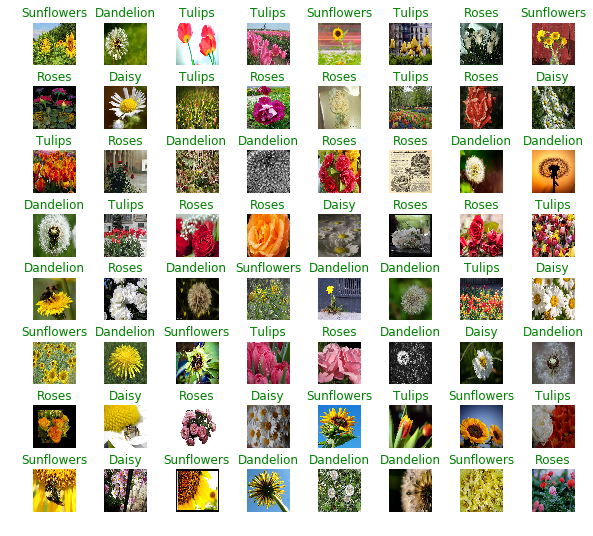

In [82]:
plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)

for n in range(64):
  plt.subplot(8,8,n+1)
  plt.imshow(flowers_data_input_batch[n])
  color = "green" if predicted_id[n] == label_id[n] else "red"
  plt.title(predicted_label_batch[n].title(), color=color)
  plt.axis('off')
